# Simulate Amazon stock prices
Using historical data from Yahoo for 2014-10-01 to 2016-09-30, we computed historical returns in a Google sheet and now we will do a Monte Carlo simulation using the standard deviation of returns.

Populating the interactive namespace from numpy and matplotlib
VaR = 23167.0465788
ES = 28360.4512264


(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   4.83628796e-06,   2.90177277e-05,
          4.35265916e-05,   1.01562047e-04,   1.45088639e-04,
          2.27305534e-04,   2.85340989e-04,   4.30429628e-04,
          5.94863419e-04,   6.23881147e-04,   1.02529305e-03,
          1.24776229e-03,   1.54761215e-03,   1.81844427e-03,
          1.81844427e-03,   2.11345784e-03,   2.19567473e-03,
          2.41814398e-03,   2.38428996e-03,   2.38912625e-03,
          2.58741406e-03,   2.43265284e-03,   2.16182072e-03,
          2.33592708e-03,   2.12313041e-03,   1.78942654e-03,
          1.78942654e-03,   1.49924927e-03,   1.37350578e-03,
          1.16554540e-03,   1.03012933e-03,   9.96275319e-04,
          8.94713272e-04,   6.62571450e-04,   5.75518267e-04,
          6.23881147e-04,   4.78792508e-04,   3.91739325e-04,
          3.14358717e-04,   2.61159550e-04,   2.27305534e-04,
          2.32141822e-04,   1.83778942e-04,   1.59597503e-04,
        

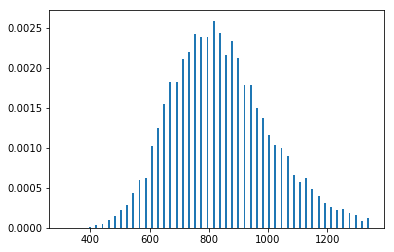

In [18]:
%pylab inline
import numpy as np
import matplotlib.pyplot as pit

current_price = 837.31
sigma_one_day = 0.2

# for Monte Carlo, we generate random log returns, apply to the current price to find simulated future prices

num_trials = 10000
mean_daily_return = 0

trials = np.random.normal(mean_daily_return, sigma_one_day, num_trials) 
np.std(trials) ## It should be around 0.2

simulated_log_return = np.random.normal(mean_daily_return, sigma_one_day, num_trials) 
            # Putting names in here can be more understandable
simulated_prices = [current_price * np.exp(ret) for ret in simulated_log_return] ## *:times
np.std(simulated_prices) ## It should be around 160

num_shars_AMZN = 100
profit_and_loss = [num_shars_AMZN * (price - current_price) for price in simulated_prices]

# VaR=value at risk
var_quantile = 0.05
#VaR = -np.percentile(profit_and_loss,1-var_quantile)
VaR= -sorted(profit_and_loss)[int(var_quantile * num_trials)] # Get one number from 'sorted(profit_and_loss)'
print('VaR = ' +str(VaR))

## negative

VaR_excessions = [loss for loss in profit_and_loss if loss< -VaR]
ES = -np.mean(VaR_excessions)
print('ES = ' +str(ES))


num_bins= 50
price_sigma = np.std(simulated_prices)
plt.hist(simulated_prices, bins=num_bins, normed= True, align='left',rwidth=0.3, 
         range=(current_price-3*price_sigma, current_price+3*price_sigma))
## It shows a picture.


plt.hist(profit_and_loss, bins=num_bins, normed= True, align='left',rwidth=0.3, 
         range=(min(profit_and_loss), max(profit_and_loss)))

